<center> <h1> CSE 574 Project 1 </h1> </center>

<center> <h2> Authors: Mihir Chauhan, Sargur Srihari </h2> </center>

<center> <h2> Due Time and Date: 11:59PM October 7th 2020 </h2> </center>

### Project 1 Task

The task of this project is to perform classification using machine learning for a two class problem. The features used for classification are pre-computed from images of a fine needle aspirate (FNA) ofa breast mass.  Your task is to classify suspected FNA cells to Benign (class 0) or Malignant (class 1) using logistic regression as the classifier. The dataset in use is the Wisconsin Diagnostic Breast Cancer (wdbc.csv).



### Dataset Description

You will be using Wisconsin Diagnostic Breast Cancer (WDBC) dataset for training, validation and testing. The  dataset you are provided with is wdbc.csv  which contains  500  data points with  31  attributes (diagnosis  (B/M),  30  real-valued  inputfeatures). 

####  How are the 30 features computed? (Below info. is just for your knowledge)
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breastmass.  Computed features describes the following characteristics of the cell nuclei present in the image. 

|    |                              Feature                              |
|----|:-----------------------------------------------------------------:|
| 1  | radius (mean of distances from center to points on the perimeter) |
| 2  | texture (standard deviation of gray-scale                         |
| 3  | perimeter                                                         |
| 4  | area                                                              |
| 5  | smoothness (local variation in radius lengths)                    |
| 6  | compactness (perimeter2/area − 1.0)                               |
| 7  | concavity (severity of concave portions of the contour)           |
| 8  | concave points (number of concave portions of the contour)        |
| 9  | symmetry                                                          |
| 10 | fractal dimension (“coastline approximation” - 1)                 |

The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in <b>30 features<b>.

### Plan of work

#### STEP 1: Import Libraries

You are NOT ALLOWED to use any libraries for directly implementing Logistic Regression.

For eg. [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <font color='red'>NOT ALLLOWED</font>

You need to implement Logistic Regression from scratch using Gradient Descent Optimization Algorithm. 

You can use libraries for:
* loading data (Pandas, Numpy), <font color='green'>ALLLOWED</font>
* Preprocessing Data (sklearn > preprocessing), <font color='green'>ALLLOWED</font>
* Partitioning Data (sklearns > train_test_split), <font color='green'>ALLLOWED</font>
* Plotting Graphs (Matplotlib) <font color='green'>ALLLOWED</font>
* Finding Accuracy, Precision, Recall using sklearn.metrics <font color='green'>ALLLOWED</font>

You can alternatively use other libraries to implement any sub-task (e.g. loading, partitioning etc.)

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from numpy import savetxt, loadtxt
% matplotlib inline

#### Step 2: Data Loading <font color='blue'>(5 Points)</font>

1. Read 'wdbc.csv' data using Pandas library. Load the data in a dataframe
2. Drop first row as it is the header row
2. Map Malignant to Class 1 and Benign to Class 0

In [2]:
data = pd.read_csv("wdbc.csv") 
data.shape
data.head(10)
# data.isna().sum()

# X = data.iloc[:, data.columns != 'y'].values
# # Y = data['y'] 
# # X,Y
# Y = Y.map({'M': 1, 'B': 0})
# Y=Y.values
# data.shape
# data.isna().sum()
# data['y'].value_counts()
# data.dtypes
# type(X,Y.values)


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_fory=LabelEncoder()
data.iloc[:,0]=labelencoder_fory.fit_transform(data.iloc[:,0].values)
data.dtypes

y        int64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
dtype: object

In [4]:
X=data.iloc[:, data.columns != 'y'].values
Y=data['y'].values
# type(Y)

#### Step 3: Data Partitioning <font color='blue'>(5 Points)</font>

1. Partition your data into training (80%), validation (20%) and testing data(20%) using sklearn library (Hint: use train_test_split)
2. Seperate Target Label (y) and Features (x1 to x30) for training, validation and testing data.

In [5]:
#splitting train-80%,val-10%,test-10%,for second train_test split 10% will be corresponds to 11.11111...%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42) #step 3
# X_train.shape,X_test.shape
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=1/9, random_state=42)
X_train.shape,X_val.shape,X_test.shape

((400, 30), (50, 30), (50, 30))

#### Step 4: Scaling Features <font color='blue'>(5 Points)</font>

One simple scaling function that you could use off the shelf is Min Max Scaler function of Sklearns. Min Max scaler function transforms features by scaling each feature to a range between <b> 0 and 1 </b>. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

$X_{std} = \frac{X - X_{min}}{X_{max} - X_{min}}$

$X_{scaled} = X_{std} * (maxRange - minRange) + minRange$

$maxRange$ = 1, <br>
$minRange$ = 0, <br>
$X_{max}$ and $X_{min}$ are over axis = 0 (Each columns max and min value) 

##### Why do we need to scale features?
We scale the data to bring all the features to the same range (in our case between 0 and 1).

#### Hint, make sure the dimensionality of the training features, weights, biases are consistent for np.dot and np.multiply

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler_train = scaler.fit_transform(X_train)
X_scaler_test = scaler.transform(X_test)
X_scaler_val=scaler.transform(X_val)
# X_scaler_test,X_scaler_train,X_scaler_val

In [7]:
# X_scaler_train.shape,X_scaler_train.shape,X_scaler_train.shape,X_scaler_train.shape

In [8]:
# Step 4 already implemented
# print(Y_train.shape[0],Y_train.shape,Y_train,X_scaler_train)
y_train_arr = Y_train.reshape(Y_train.shape[0],1).T
x_train_arr = X_scaler_train.T
y_val_arr = Y_val.reshape(Y_val.shape[0],1).T
x_val_arr = X_scaler_val.T
y_test_arr  = Y_test.reshape(Y_test.shape[0],1).T
x_test_arr  = X_scaler_test.T

In [9]:
def prediction(X, w, b):
    y_predict = np.zeros((1,X.shape[1] ))
    Z=np.dot(w.T, X)+b
    A_pred=1/(1+np.exp(-(Z)))
    for i in range(A_pred.shape[1]):
        if(A_pred[0,i]>0.5):y_predict[0,i]=1
        else:y_predict[0,i]=0
    return y_predict

#### Step 5: Initialization of Variables
* Initialize Hyper-Parameters (Learning Rate, Number of Epochs) to some value
* Initialize weights to any random values (We have initialized weights as an array random values sampled from a normal distribution)
* Initialize bias to any scalar value (We have initialized bias to value 0)
* Initialize other variables which may be used for tracking cost, number of data points etc..

In [10]:
# Hyper parameter initialization
learningrate = 0.01
epochs = 30000
bias = 0

# intialize matrix with random values for weights with normal distribution
# Return a sample (or samples) from the “standard normal” distribution.
weights = np.random.randn(30,1)
training_cost = []
val_cost = []
training_accuracy=[]
validation_accuracy=[]

w=weights
b=bias
  

#### Step 6: TRAINING with Logistic Regression Implementation using Gradient Descent Algorithm <font color='blue'>(30 Points)</font>

Iteratively update the weights and biases for each epoch using:
* Step 6.1: Use genesis equation $\hat{y} = \sigma (W.X + b)$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value which will be between 0 and 1. (You will have to perform same operation on validation set as well)
* Step 6.2: Find Binary Cross Entropy Cost for training and validation set using predicted value $\hat{y}$ and truth value $y$
* Step 6.3: Find $ \Delta W = \frac{\delta L}{\delta W}$ and $ \Delta b = \frac{\delta L}{\delta b}$ (Proof for finding  $ \Delta W$ and $\Delta b$ is available in prof. slides)
* Step 6.4: Update $W$ and $b$ using learning rate as follows:
  - $W = W - learningRate*\Delta W$
  - $b = b - learningRate*\Delta b$
* Step 6.5: Store BCE Cost for training and validation in seperate cost tracking list
* Step 6.6: Calculate Training and Validation Accuracy and store in seperate accuracy tracking list (<b>Hint</b>: Threshold $\hat{y}$ to 0.5 for category determination for finding accuracy)

Run step 6 multiple times, each time with a different set of hyperparameters and determine the best set of hyperparameters which gives best training and validation accuracy. 

Corresponding to the best set of hyper parameters, you should get the best set of weights and bias.

In [11]:
def accuracy_value(predictions , truth):
  return (100 - np.mean(np.abs(predictions - truth)) * 100)

for i in range(epochs):
    m_train = x_train_arr.shape[1]
    Z_train = np.dot(w.T, x_train_arr) + b    
    
    A_train=1/(1+np.exp(-Z_train))
    cost_train= -(1/m_train) * np.sum(y_train_arr * np.log(A_train) + (1-y_train_arr) * np.log(1-A_train))

    m_val = x_val_arr.shape[1]
    Z_val = np.dot(w.T, x_val_arr) + b    
    
    A_val=1/(1+np.exp(-Z_val))
    cost_val= -(1/m_val) * np.sum(y_val_arr * np.log(A_val) + (1-y_val_arr) * np.log(1-A_val))

    dw = (1/m_train)* np.dot(x_train_arr, (A_train-y_train_arr).T)
    db = (1/m_train)* np.sum(A_train-y_train_arr)
    w = w - learningrate * dw
    b = b - learningrate * db

    training_cost.append(cost_train)
    val_cost.append(cost_val)
    Y_prediction_train = prediction(x_train_arr, w, b)
    Y_prediction_val = prediction(x_val_arr, w, b)
    training_accuracy.append(accuracy_value(Y_prediction_train , y_train_arr))
    validation_accuracy.append(accuracy_value(Y_prediction_val , y_val_arr))

    
#calculating accuracy 
Y_prediction_train = prediction(x_train_arr, w, b)
Y_prediction_val = prediction(x_val_arr, w, b)
Y_prediction_test = prediction(x_test_arr,w, b)
      
print("\n Training accuracy is : {} %".format(accuracy_value(Y_prediction_train , y_train_arr)))
print("\n validation accuracy is : {} %".format(accuracy_value(Y_prediction_val , y_val_arr)))   
print("\n Test accuracy is : {} %".format(accuracy_value(Y_prediction_test , y_test_arr)))




 Training accuracy is : 96.0 %

 validation accuracy is : 92.0 %

 Test accuracy is : 92.0 %


After performing all the steps above, the best set of updated weights and bias should be stored as a <i>weights_biases.csv</i> file. Your <i>weights_biases.csv</i> will tested on a hidden test set and you would be graded on how well your model (weights) performed on this hidden set <font color='blue'>(30 Points)</font>

<b>(Do not change the code provided in the cell below for storing the weights and bias)</b>

In [12]:
# Save the weights file (DO NOT CHANGE THIS CODE)
weights_bias = np.append(weights,bias)

if weights_bias.shape == (31,):
    print("Weights and Bias consistent :) ")
    savetxt('weights_bias.csv', weights_bias, delimiter=',')
else:
    print("Weights and Bias inconsistent :( \\
          Weights array shape should be (30,) and Bias should be a scalar \\
          weights_bias variable should be shaped as (31,)")

Weights and Bias consistent :) 


#### Step 7: Plot Training and Validation Cost vs Number of Epochs <font color='blue'>(5 Points)</font>

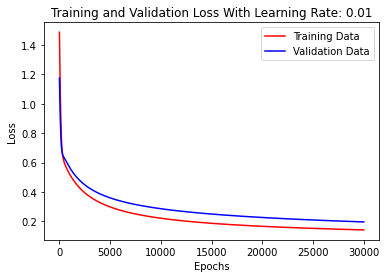

In [13]:
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost, color='red', label='Training Data')
plt.plot(val_cost, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####  Step 8: Plot Training and Validation Accuracy vs Number of Epochs <font color='blue'>(5 Points)</font>

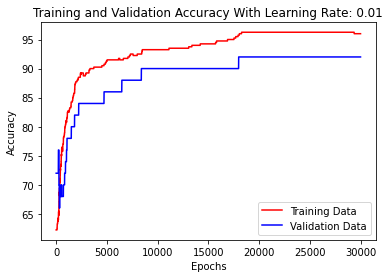

In [14]:
import matplotlib.pyplot as plt
plt.title('Training and Validation Accuracy With Learning Rate: ' + str(learningrate))
plt.plot(training_accuracy, color='red', label='Training Data')
plt.plot(validation_accuracy, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Step 9: Test your model using tesing data <font color='blue'>(15 Points)</font>

* Step 9.1: Use genesis equation $\hat{y} = \sigma (W.X_{test} + b)$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value which will be between 0 and 1.
* Step 9.2: Threshold $\hat{y}$ at 0.5 to find the category for each data point.
* Step 9.3: Find accuracy, precision and recall for testing data (you can use sklearns.metrics library)

In [15]:
Y_prediction_test = prediction(x_test_arr,w, b)
print("\nTest accuracy: {} %".format(accuracy_value(Y_prediction_test , y_test_arr)))
from sklearn.metrics import accuracy_score,recall_score,average_precision_score
accuracy_score(Y_test, Y_prediction_test.flatten())


Test accuracy: 92.0 %


0.92

In [16]:
recall_score(Y_test, Y_prediction_test.flatten())

0.8333333333333334

In [17]:
from sklearn.metrics import precision_score
precision_score(Y_test, Y_prediction_test.flatten())

0.9375

#### Step 10: Submission to timberlake server

* The code for your implementation should be in this Python notebook with necessary comments within the code.

* Your <b> Python Code file </b> `main.ipynb`, <b> Data File </b> `wdbc.csv` and your <b>Trained Weights and Bias File</b> `weights_bias.csv`</b> should be put in a single folder named as `proj1code`. 

* `proj1code` folder should be zipped with the resulting zip file name as `proj1code.zip`.

* Submit the Python code on CSE timberlake server with the following script:

 - `submit_cse474 proj1code.zip` for undergraduates
 - `submit_cse574 proj1code.zip` for graduates

### Grading Rubric
* <b>30 Points:</b> Your trained `weights_bias.csv` will be automatically graded using a script on unbiased hidden test data file. Hence, it is important that your `weights_biases` should of dimensionality (31,) and properly trained.
* <b>30 Points:</b> Training logic for implementing logistic regression (Step 6)
* <b>15 Points:</b> Testing Accuracy, Precision and Recall (Step 9)
* <b>5 Points:</b> Plot of Training and Validation cost vs No. of epochs (Step 7) 
* <b>5 Points:</b> Plot of Training and Validation accuracy vs No. of epochs (Step 8)
* <b> 5 points: </b> Scaling features (Step 4)
* <b> 5 points: </b> Partitioning Data (Step 3)
* <b> 5 points: </b> Data loading (Step 2)